<a href="https://colab.research.google.com/github/TarunKumar19/Cotton-Disease-Predection./blob/main/Cotton_Disease_Predection_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [88]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/train'
valid_path = '/content/drive/MyDrive/val'

In [90]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [91]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/data/train/*')
folders

['/content/drive/MyDrive/data/train/fresh cotton plant',
 '/content/drive/MyDrive/data/train/diseased cotton leaf',
 '/content/drive/MyDrive/data/train/fresh cotton leaf',
 '/content/drive/MyDrive/data/train/diseased cotton plant']

In [92]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [93]:
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [94]:
# view the structure of the model
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [95]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [96]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.utils import array_to_img, img_to_array, load_img

In [97]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [98]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [99]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [100]:
# fit the model
# Run the cell. It will take some time to execute
history=model.fit(training_set,validation_data=test_set,epochs=20,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/20
61/61 [==============================] - 54s 782ms/step - loss: 3.1771 - accuracy: 0.7089 - val_loss: 0.9105 - val_accuracy: 0.7778
Epoch 2/20
61/61 [==============================] - 40s 663ms/step - loss: 0.5523 - accuracy: 0.9011 - val_loss: 0.4312 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 42s 680ms/step - loss: 0.4485 - accuracy: 0.9144 - val_loss: 0.9479 - val_accuracy: 0.7778
Epoch 4/20
61/61 [==============================] - 41s 665ms/step - loss: 0.5099 - accuracy: 0.9103 - val_loss: 0.2846 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 41s 669ms/step - loss: 0.6129 - accuracy: 0.9108 - val_loss: 0.3131 - val_accuracy: 0.8889
Epoch 6/20
61/61 [==============================] - 41s 674ms/step - loss: 0.5976 - accuracy: 0.9185 - val_loss: 0.3469 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 41s 668ms/step - loss: 0.7761 - accuracy: 0.9139 - val_loss: 0.1515 - val_accuracy: 0.8889

In [101]:
import matplotlib.pyplot as plt

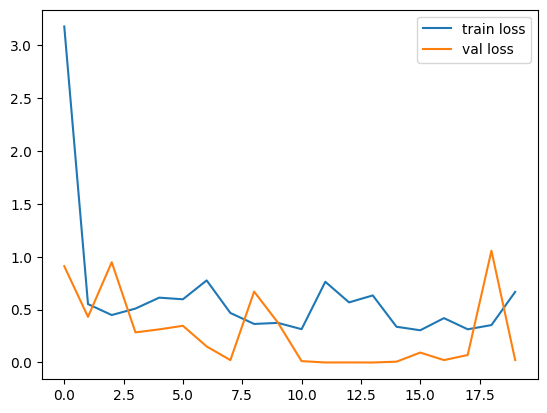

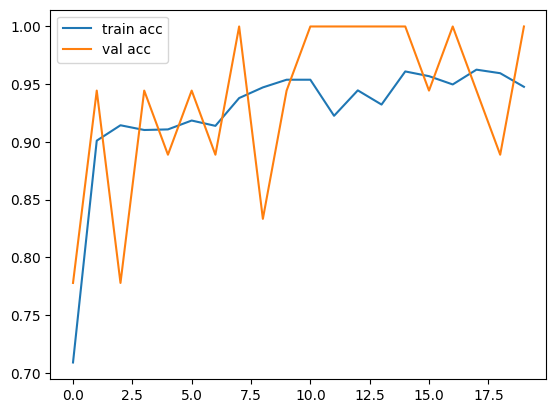

<Figure size 640x480 with 0 Axes>

In [102]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [104]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('InceptionV3.h5')

In [105]:
y_pred = model.predict(test_set)

1/1 [==============================] - 4s 4s/step


In [106]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [107]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [108]:
model=load_model('model_resnet50.h5')

In [129]:
img=image.load_img('/content/drive/MyDrive/data/test/diseased cotton plant/dd (367).jpg',target_size=(224,224))

In [130]:
x=image.img_to_array(img)


In [131]:
x.shape

(224, 224, 3)

In [132]:
x=x/255

In [133]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [134]:
model.predict(img_data)

1/1 [==============================] - 0s 38ms/step


array([[1.1328165e-01, 1.3327913e-05, 8.8289160e-01, 3.8135347e-03]],
      dtype=float32)

In [136]:
a=np.argmax(model.predict(img_data), axis=1)
a==3

1/1 [==============================] - 0s 25ms/step


array([False])

In [53]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [138]:
classes = { 0:'diseased cotton leaf',
            1:'diseased cotton plant', 
            2:'diseased cotton leaf', 
            3:'diseased cotton plant', 
          }

In [141]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((224,224))
    data.append(np.array(image))
    X_test=np.array(data)
    predict_x = model.predict(X_test)
    Y_pred =np.argmax(predict_x,axis=1)
 
    return image,Y_pred
     

1/1 [==============================] - 1s 1s/step
Predicted traffic sign is:  diseased cotton leaf


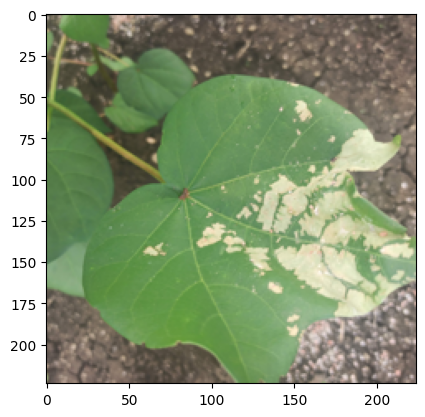

In [142]:
plot,prediction = test_on_img(r'/content/drive/MyDrive/data/test/diseased cotton leaf/dis_leaf (124).jpg')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()